In [34]:
!pwd
import os
print(os.listdir("data/"))

/resources/Portfolio/Marketing Analytics
['salesDataMon2To4.csv', 'churn_data.csv', 'online-Copy1.csv', 'online12M.csv', 'online.csv', 'salesData.csv']


In [35]:
!pip3 install seaborn==0.9.0

/bin/sh: 1: pip3: not found


### Загрузка необходимых библиотек и модулей

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import datetime as dt

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Загрузка данных и первичный анализ данных
в данном кейс произведен анализ и сегментация клиентов на основе данных онлайн-ритейла

In [39]:
online = pd.read_csv("data/online.csv")

# Converting string dates to datetime64
online.InvoiceDate = pd.to_datetime(online.InvoiceDate) 

In [40]:
online.info()
online.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
Unnamed: 0     70864 non-null int64
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


### Краткое содержание данного анализа
1. Расчет основных маркетологических параметров для дальнейшего анализа
2. Предварительная подготовка данных для дальнейшего машинного обучения
3. Анализ данных и определение колиства сегментов (групп)
4. Кластеризация данных при помощи метода k-средних
5. Аналитический анализ и визуализация полученного результата

# Сегментация рынка (Customer segmentation)
Сегментация рынка — процесс разбивки текущих или потенциальных потребителей на различные группы, в рамках которых потребители имеют схожие или аналогичные запросы.

<pr> В данном случае сегментация рынка будет произведена на основе следующих маркетологических параметров: новизны, частоты, денежных средств и как долго покупатель является клиентом компании (Recency, Frequency, Monetary value and Tenure)<pr>

## Основные шаги при проведении сегментации рынка при помощи машинного обучения на неразмеченных данных (Unsupervised machine learning)
* Расчет основных маркетологических параметров на основе, которых будет проводится сегментация рынка (новизна, частота, денежные средства и пребывание)
* Предварительная подготовка данных для дальнейшего машинного обучения
* Анализ данных и определение количества сегментов (групп)
* Кластеризация данных при помощи метода k-средних 
* Аналитический анализ и визуализация полученного результата 

## __1. Расчет основных маркетологических параметров для дальнейшего анализа__
* Новизна (Recency) количество дней с момента последней транзакции
* Частота (Frequency) количество транзакций за последние 12 месяцев
* Денежные средства (Monetary value) общая стоимость товаров, которые были приобретены клиентом в течение последних 12 месяцев
* Пребывание (Tenure) как долго покупатель является клиентом компании, время с момента первой транзакции

Расчет вышеперечисленных параметров, осуществляется при помощи Когортного анализа.
<br>В данном случае все клиенты делятся на когорты по времени в зависимости от того, когда они совершили первую транзакцию

In [41]:
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# идентифицировать все ранзакции совершенные пользователем
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Определить время первой транзакции
online['CohortDay'] = grouping.transform('min')

In [42]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


### раcчет смещения по времени в днях

In [43]:
# функция которая выделяет в отдельную переменную год, месяц и день
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [44]:
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [45]:
# разница в годах
years_diff = invoice_year - cohort_year

# разница в месяцах
months_diff = invoice_month - cohort_month

# разница в днях
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,195
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,69
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,91


In [46]:
# в качестве текущей даты в анализе будет использована дата последней транзакции плюс один день
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:49:00')

In [47]:
# группировка данных по ID пользователя и вычисление основных маркетологических метрик
datamart_rfmt = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum', 
    'CohortIndex': 'max'})

datamart_rfmt.rename(columns = { 'InvoiceDate': 'Recency',
                                 'InvoiceNo': 'Frequency',
                                 'UnitPrice': 'MonetaryValue', 
                                 'CohortIndex': 'Tenure'}, inplace=True)

# Check the first rows
datamart_rfmt.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,2,27,126.26,368
12748,1,967,3098.10,370
12749,4,37,161.75,207
12820,3,17,33.57,320
12822,71,9,24.16,18


## __2. Предварительная подготовка данных для дальнейшего машинного обучения__
Если мы планируем использовать метод  k-средних для проведения сегментации рынка, то сперва мы  должны убедиться что наши данные отвечают следующим требованиям:
* переменные должны иметь  симметричное распределение
* все переменные должны иметь одно и тоже среднее значение (average value)
* все переменные должны иметь одно  и тот же стандартное отклонение (standard deviation)

### Предварительный статистический анализ данных

In [48]:
print(datamart_rfmt.mean())

print(datamart_rfmt.std())

print(datamart_rfmt.describe())

Recency           94.298568
Frequency         19.147257
MonetaryValue     58.648682
Tenure           124.010808
dtype: float64
Recency           99.974969
Frequency         44.831615
MonetaryValue    210.647682
Tenure           130.609136
dtype: float64
           Recency    Frequency  MonetaryValue       Tenure
count  3701.000000  3701.000000    3701.000000  3701.000000
mean     94.298568    19.147257      58.648682   124.010808
std      99.974969    44.831615     210.647682   130.609136
min       1.000000     1.000000       0.080000     1.000000
25%      19.000000     4.000000       9.950000     1.000000
50%      52.000000     9.000000      27.230000    74.000000
75%     151.000000    21.000000      59.990000   242.000000
max     374.000000  1532.000000    8209.550000   374.000000


__из данного статистического анализа видно, что переменные имеют различные средние значения и стандартное отклонение__

### Предварительный визуальный анализ распределения интересующих нас маркетологических показателей 

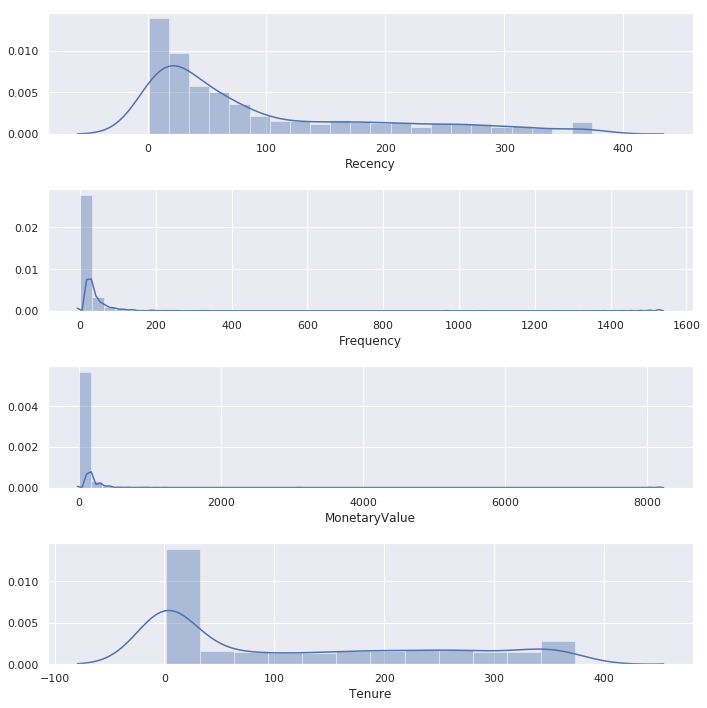

In [49]:
plt.figure(figsize=(10,10))

# распределение показателя 'новизны'
plt.subplot(4, 1, 1); sns.distplot(datamart_rfmt['Recency'], kde_kws={"linewidth": 1.5})

# распределение показателя 'частоты'
plt.subplot(4, 1, 2); sns.distplot(datamart_rfmt['Frequency'], kde_kws={"linewidth": 1.5})

# распределение показателя 'денежные средства'
plt.subplot(4,1, 3); sns.distplot(datamart_rfmt['MonetaryValue'], kde_kws={"linewidth": 1.5})

# распределение показателя 'пребывание'
plt.subplot(4,1, 4); sns.distplot(datamart_rfmt['Tenure'], kde_kws={"linewidth": 1.5})

plt.tight_layout()
plt.show()

#### Предварительная обработка данных

In [50]:
datamart_log = np.log(datamart_rfmt)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datamart_log)

datamart_normalized = scaler.transform(datamart_log)

datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfmt.index, columns=datamart_rfmt.columns)

#### Визуальный анализ распределения интересующих нас маркетологических показателей после предварительной обработки

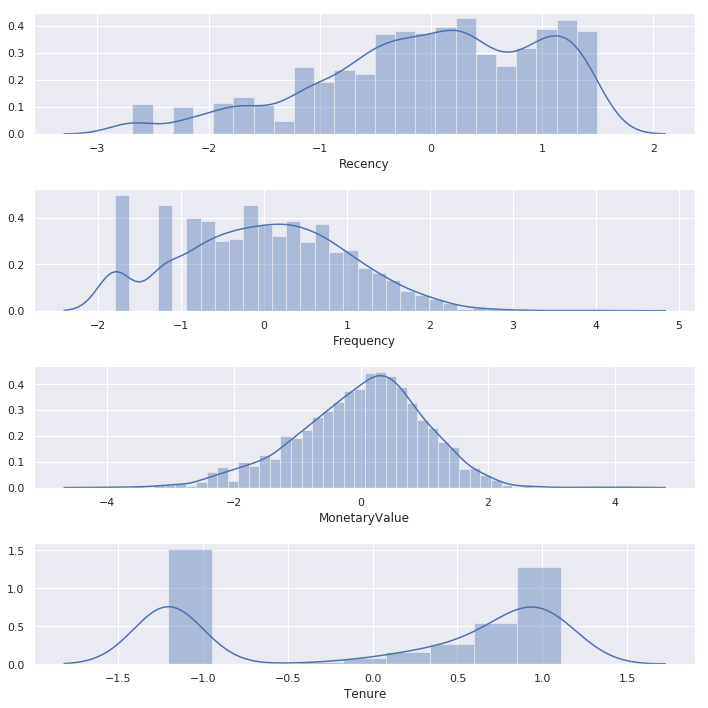

In [52]:
plt.figure(figsize=(10,10))

# Plot recency distribution
plt.subplot(4, 1, 1); sns.distplot(datamart_normalized['Recency'],  kde_kws={"linewidth": 1.5})

# Plot frequency distribution
plt.subplot(4, 1, 2); sns.distplot(datamart_normalized['Frequency'], kde_kws={"linewidth": 1.5})

# Plot monetary value distribution
plt.subplot(4, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'], kde_kws={"linewidth": 1.5})

# Plot monetary value distribution
plt.subplot(4,1, 4); sns.distplot(datamart_normalized['Tenure'], kde_kws={"linewidth": 1.5})

# Show the plot
plt.tight_layout()
plt.show()

## __3. Анализ данных и определение колиства сегментов (групп)__
Одним из наиболее распространенных методов определения количества сигментов является визуальный метод, который называется Метод критерия локтя (Elbow criterion method). Данный метод заключается в следующем:
* Сперва необходимо построить несколько моделей и построить для них график зависимости суммы квадратических ошибок от выбранного количества сегментов
* Определить при каком значение на графики образуется "локоть
* Так называемый "локоть" - представляет наиболее оптимальное количество сегментов для последующего построения модели

In [53]:
from sklearn.cluster import KMeans 
import seaborn as sns 
from matplotlib import pyplot as plt 

#### расчет суммы квадратических ошибок sum of squared errors (SSE) 

In [54]:
sse = {}
for k in range(1, 11):
    
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(datamart_normalized)

    sse[k] = kmeans.inertia_ 

#### график зависимости суммы квадратических ошибок от выбранного количества сегментов

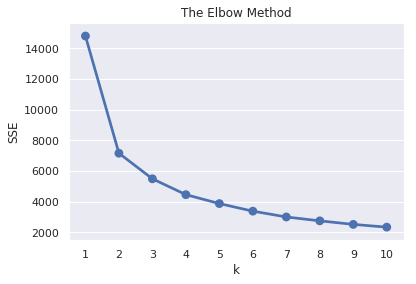

In [55]:
# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Так называемый локоть образуется при количестве кластеров равном 3, либо 4

## __4. Кластеризация данных при помощи метода k-средних__

Разделение клиентов на 4 категории при помощи метода машинного обучения на неразмеченных данных так называемого метода k-средних 

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 1) 

kmeans.fit(datamart_normalized)

cluster_labels = kmeans.labels_

## __5. Аналитический анализ и визуализация полученного результата__

### Методы построения профилей для каждого сегмента покупателей
* Статистический анализ показателей для каждого сегмента покупателей
* Построение Snake plots для каждого сегмента клиентов
* Относительная важность атрибутов кластера по сравнению с населением

## Статистический анализ показателей для каждого сегмента покупателей

In [57]:
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          80.8      12.4          36.6  169.8  1259
1         158.4       1.8           3.8    4.9   656
2         149.6       7.1          23.9    1.5   858
3          16.2      51.7         159.4  259.4   928

## Построение Snake plots для каждого сегмента клиентов
* Техника маркетологического исследования, которая позволяет сравнить различные сегменты между собой
* Визуальный анализ основных маркетологических параметров каждого сегмента

### Подготовка данных для построения графиков
как и в случае использования метода k-средних для проведения сегментации рынка, так и при построении Snake plots необходима предварительная обработка данных: 
* переменные должны иметь  симметричное распределение
* все переменные должны иметь одно и тоже среднее значение (average value)
* все переменные должны иметь одно  и тот же стандартное отклонение (standard deviation)

In [58]:
datamart_normalized.describe()

,Recency,Frequency,MonetaryValue,Tenure
count,3.701000e+03,3.701000e+03,3.701000e+03,3.701000e+03
mean,1.852672e-16,1.315109e-16,-9.431346e-17,1.267112e-16
std,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00
min,-2.684553e+00,-1.794238e+00,-4.086634e+00,-1.204813e+00
25%,-6.076932e-01,-6.569832e-01,-6.223824e-01,-1.204813e+00
50%,1.024565e-01,8.268065e-03,1.006957e-01,4.773814e-01
75%,8.543851e-01,7.033537e-01,6.679978e-01,9.404751e-01
max,1.494121e+00,4.222521e+00,4.200894e+00,1.110614e+00


In [59]:
datamart_normalized =  datamart_normalized.assign(Cluster = cluster_labels)

In [60]:
datamart_normalized.head()

,Recency,Frequency,MonetaryValue,Tenure,Cluster
CustomerID,,,,,
12747,-2.195642,0.909521,1.202481,1.104293,3
12748,-2.684553,3.845050,3.500970,1.106411,3
12749,-1.706731,1.168000,1.380394,0.879419,3
12820,-1.909647,0.530005,0.251031,1.049669,3
12822,0.322128,0.008268,0.014780,-0.075144,0


#### __Преобразование данных в "длинный" формат__
слияние все маркетологических метрик (Frequency, MonetaryValue, Recency, Tenure) в одну переменную (Metric)

In [61]:
datamart_melt = pd.melt(
                    datamart_normalized.reset_index(), 
                        
                    id_vars=['CustomerID', 'Cluster'],

                    value_vars=['Recency', 'Frequency', 'MonetaryValue', 'Tenure'], 
                        
                    var_name='Metric', value_name='Value')

In [62]:
datamart_melt.head()

,CustomerID,Cluster,Metric,Value
0,12747,3,Recency,-2.195642
1,12748,3,Recency,-2.684553
2,12749,3,Recency,-1.706731
3,12820,3,Recency,-1.909647
4,12822,0,Recency,0.322128


#### __Построение Snake plots__

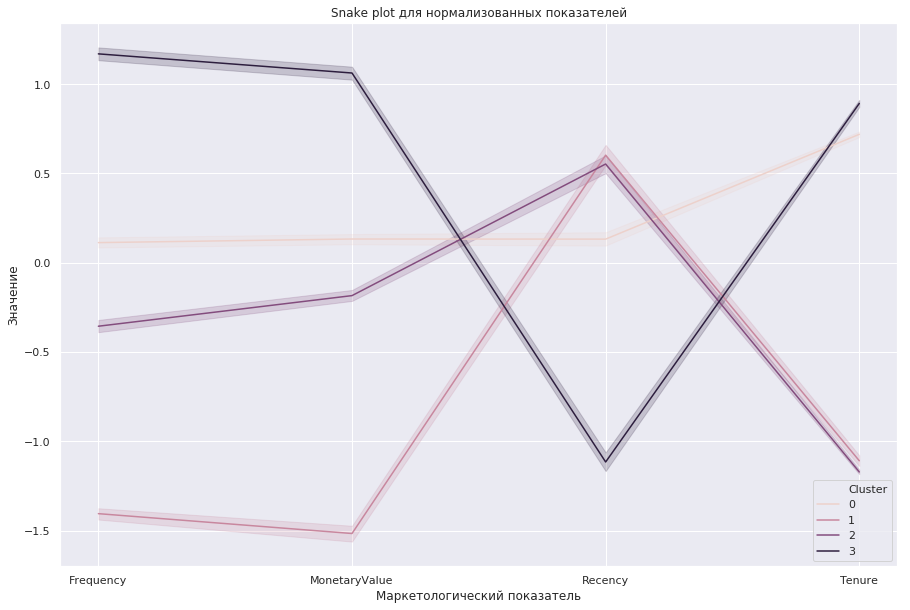

In [73]:
plt.figure(figsize=(15,10))

plt.title('Snake plot для нормализованных показателей')

_= sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')

plt.xlabel('Маркетологический показатель')

plt.ylabel('Значение')

plt.show()

## Относительная важность маркетологических показателей каждого сегмента
Данный анализ позволяет определить относительную важность каждого маркетологического показателя для каждого сегмента пользователей
<pr> каким образом проводится данный анализ: 
* Сперва рассчитывается среднее значение каждого маркетологического показателя для каждого сегмента покупателей по отдельности
* Далее рассчитывается среднее значение каждого маркетологического показателя для популяции
* расчет оценки важности производиться путем деления среднего значения сегмента на среднее  значение популяции и вычитанием от полученного результата 1 (при этом необходимо убедиться, что в случае если среднее значение сегмента равно среднему значению популяции, то в данном случае оценка важности должна равняться 0)

#### Расчет относительной важности каждого показателя 

In [64]:
# рассчет среднее значение каждого маркетологического показателя для каждого сегмента покупателей
cluster_avg = datamart_rfmt_k4.groupby(['Cluster']).mean() 

# рассчет среднее значение каждого маркетологического показателя для популяции
population_avg = datamart_rfmt.mean()

# расчет оценки важности основным маркетологических показателей сегмента по отношению к показателям популяции
relative_imp = cluster_avg / population_avg - 1

#### Анализ и визуализация относительной важности показателей
__Интерпретация:__ чем дальше полученное значение от 0 тем важнее данный показатель является для сегмента

In [65]:
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue  Tenure
Cluster                                           
0          -0.14      -0.35          -0.38    0.37
1           0.68      -0.90          -0.93   -0.96
2           0.59      -0.63          -0.59   -0.99
3          -0.83       1.70           1.72    1.09


#### Визуализация относительной важности показателей при помощи heatmap

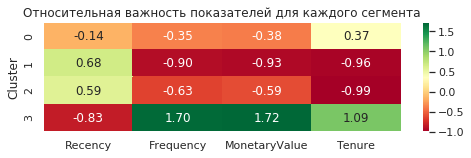

In [66]:
#раземеры графика
plt.figure(figsize=(8, 2))

#название графика
plt.title('Относительная важность показателей для каждого сегмента')

sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()